## Imports

In [80]:
# Utils
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Spliter.
from sklearn.model_selection import train_test_split

In [81]:
# Global variables
cutsAmount = 5

## Read the data for the first time

In [82]:
citrusDataset = pd.read_csv("./citrus.csv")
citrusDataset.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


Orange       : 0.500000
Grapefruit   : 0.500000


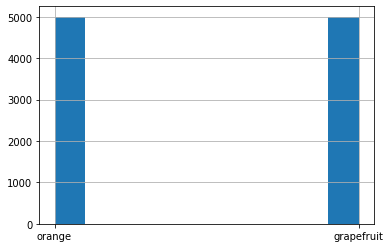

In [83]:
Y = citrusDataset['name'].value_counts()
print('Orange       : {0:f}'.format(Y[0]/len(citrusDataset)))
print('Grapefruit   : {0:f}'.format(Y[1]/len(citrusDataset)))
citrusDataset['name'].hist()
plt.show()

### Create the labels.
We are going to create a vector filled with 0's and 1's based in the quality.

In [84]:
Y = [int(citrusDataset['name'][i] == 'grapefruit') for i in range(len(citrusDataset))]
citrusDataset['classification'] = Y
citrusDataset.drop('name', axis=1, inplace=True)

citrusDataset.head()

,diameter,weight,red,green,blue,classification
0,2.96,86.76,172,85,2,0
1,3.91,88.05,166,78,3,0
2,4.42,95.17,156,81,2,0
3,4.47,95.60,163,81,4,0
4,4.48,95.76,161,72,9,0


## First experiment: normalize data
For the first experiment we are just going to normalize the data as feature engineering.

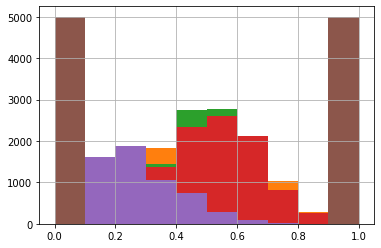

In [85]:
# Store the current labels to asign them later.
citrusDatasetLabels = citrusDataset['classification']

# Normalize the data using min max scaler.
citrusDatasetValues = citrusDataset.values
citrusDatasetNormalized = preprocessing.MinMaxScaler().fit_transform(citrusDataset)
# Create a new pandas dtta frame and reasing the 'classification' column, to prevent this for be normalized.
citrusDatasetNormalized = pd.DataFrame(citrusDatasetNormalized, columns=citrusDataset.columns)
citrusDatasetNormalized['classification'] = citrusDatasetLabels

for feature in citrusDataset.columns:
    citrusDatasetNormalized[feature].hist()

## Second experiment: standardize data
For the first experiment we are just going to standardize the data as feature engineering.

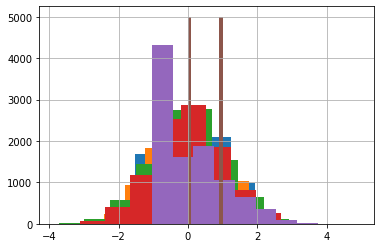

In [86]:
# Store the current labels to asign them later.
citrusDatasetLabels = citrusDataset['classification']

# Normalize the data using min max scaler.
citrusValues = citrusDataset.values
citrusDatasetStandardized = preprocessing.StandardScaler().fit_transform(citrusDatasetValues)
# Create a new pandas dtta frame and reasing the 'classification' column, to prevent this for be normalized.
citrusDatasetStandardized = pd.DataFrame(citrusDatasetStandardized, columns=citrusDataset.columns)
citrusDatasetStandardized['classification'] = citrusDatasetLabels

for feature in citrusDatasetStandardized.columns:
    citrusDatasetStandardized[feature].hist()

## Third experiment: better feature engineering
We are goin to use IQR for removing outliers in the datasets and check for missing values and duplicated
### Check missing values

In [87]:
citrusDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diameter        10000 non-null  float64
 1   weight          10000 non-null  float64
 2   red             10000 non-null  int64  
 3   green           10000 non-null  int64  
 4   blue            10000 non-null  int64  
 5   classification  10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


Check for duplicated

In [88]:
citrusDataset.duplicated().sum()

0

Delete standard deviation columns. We are going to classify according to the mean values. 

In [89]:
dataSetBetterFE = citrusDataset.copy()

## Delete outliers with IQR technique

In [90]:

# Describe the quantils for each features
print(dataSetBetterFE.columns)
dataSetBetterFE.head()

Index(['diameter', 'weight', 'red', 'green', 'blue', 'classification'], dtype='object')


,diameter,weight,red,green,blue,classification
0,2.96,86.76,172,85,2,0
1,3.91,88.05,166,78,3,0
2,4.42,95.17,156,81,2,0
3,4.47,95.60,163,81,4,0
4,4.48,95.76,161,72,9,0


In [91]:
dataSetBetterFE.describe()

,diameter,weight,red,green,blue,classification
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200,0.500000
std,1.947844,29.212119,10.432954,11.708433,9.061275,0.500025
min,2.960000,86.760000,115.000000,31.000000,2.000000,0.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000,0.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000,0.500000
75%,11.480000,197.722500,161.000000,84.000000,17.000000,1.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000,1.000000


In [92]:
def calculateBoundsWithIQR(datacolumn):
    Q1 = datacolumn.quantile(0.25)
    Q3 = datacolumn.quantile(0.75)

    IQR = Q3-Q1

    lowerRange = Q1 - (1.5 * IQR)
    higherRange = Q3 + (1.5 * IQR)

    return lowerRange, higherRange

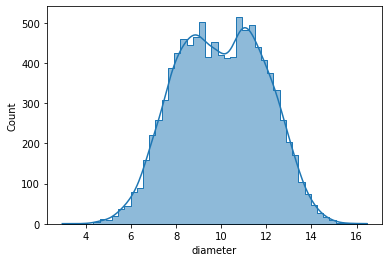

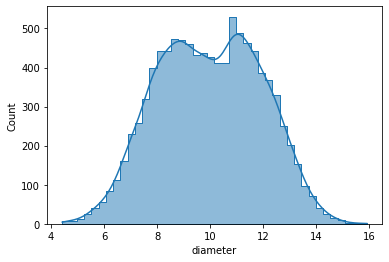

In [93]:
sns.histplot(dataSetBetterFE['diameter'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['diameter'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['diameter'] > lower) & (dataSetBetterFE['diameter'] < higher)]
sns.histplot(dataSetBetterFE['diameter'], kde=True, element='step')
plt.show()

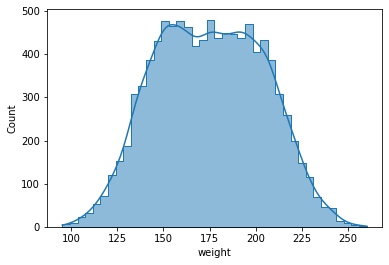

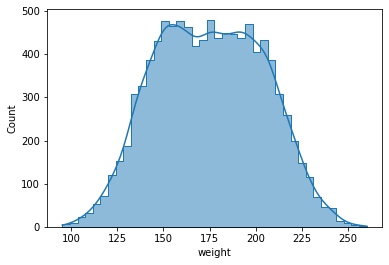

In [94]:
sns.histplot(dataSetBetterFE['weight'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['weight'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['weight'] > lower) & (dataSetBetterFE['weight'] < higher)]
sns.histplot(dataSetBetterFE['weight'], kde=True, element='step')
plt.show()

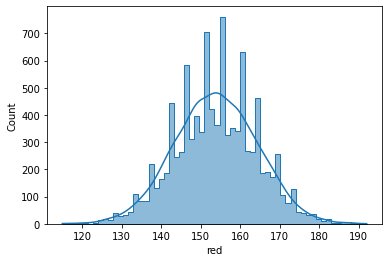

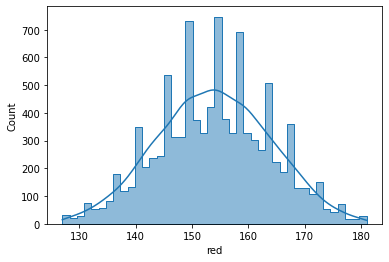

In [95]:
sns.histplot(dataSetBetterFE['red'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['red'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['red'] > lower) & (dataSetBetterFE['red'] < higher)]
sns.histplot(dataSetBetterFE['red'], kde=True, element='step')
plt.show()

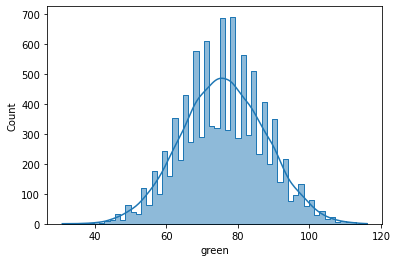

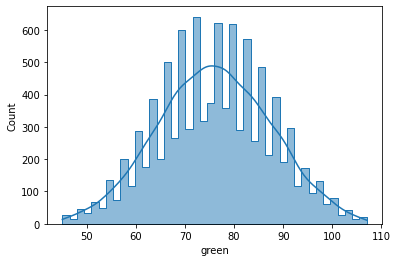

In [96]:
sns.histplot(dataSetBetterFE['green'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['green'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['green'] > lower) & (dataSetBetterFE['green'] < higher)]
sns.histplot(dataSetBetterFE['green'], kde=True, element='step')
plt.show()

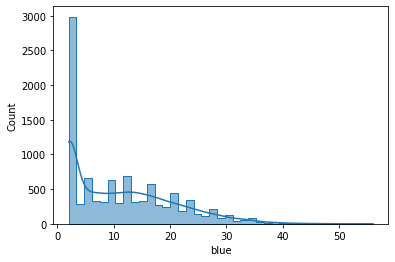

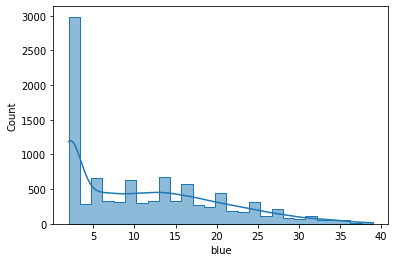

In [97]:
sns.histplot(dataSetBetterFE['blue'], kde=True, element='step')
plt.show()

lower, higher = calculateBoundsWithIQR(dataSetBetterFE['blue'])
dataSetBetterFE = dataSetBetterFE[(dataSetBetterFE['blue'] > lower) & (dataSetBetterFE['blue'] < higher)]
sns.histplot(dataSetBetterFE['blue'], kde=True, element='step')
plt.show()

In [98]:

dataSetBetterFE.shape

(9823, 6)

In [99]:
# Get the columns needed to calculate the vif
variables = dataSetBetterFE[[
       'diameter', 'weight', 'red', 'green', 'blue']]
constants = add_constant(variables)

# Calculate the vif and store the values in a pandas data frame to display it.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(constants.values, i) for i in range (constants.shape[1])]
vif['features'] = constants.columns
vif

,VIF,features
0,1035.595465,const
1,1064.092753,diameter
2,1055.600295,weight
3,1.061524,red
4,1.231801,green
5,1.188618,blue


In [100]:
citrusDataset.drop('diameter', axis=1, inplace=True)

# Get the columns needed to calculate the vif
variables = dataSetBetterFE[[
    'weight', 'red', 'green', 'blue']]
constants = add_constant(variables)

# Calculate the vif and store the values in a pandas data frame to display it.
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(constants.values, i) for i in range (constants.shape[1])]
vif['features'] = constants.columns
vif

,VIF,features
0,397.087147,const
1,1.322891,weight
2,1.054094,red
3,1.204274,green
4,1.168096,blue


(9823, 6)
Orange       : 0.502189
Grapefruit   : 0.497811


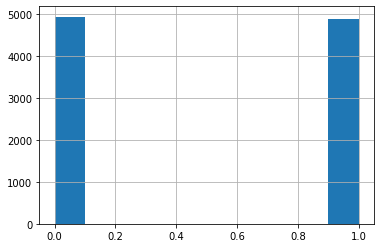

In [101]:
classification = dataSetBetterFE['classification'].value_counts()
print(dataSetBetterFE.shape)
print('Orange       : {0:f}'.format(classification[0]/len(dataSetBetterFE)))
print('Grapefruit   : {0:f}'.format(classification[1]/len(dataSetBetterFE)))
dataSetBetterFE['classification'].hist()
plt.show()

### Standardize the data

In [102]:
dataSetBetterFELabels = dataSetBetterFE['classification'].values

# Standardize the data using standar scaler.
dataSetBetterFEValues = dataSetBetterFE.values
dataSetBetterFEStandardized = preprocessing.StandardScaler().fit_transform(dataSetBetterFEValues)

# Create a new pandas data frame and reasing the 'classification' column, to prevent this for be standardized.
dataSetBetterFE = pd.DataFrame(dataSetBetterFEStandardized, columns=dataSetBetterFE.columns)
dataSetBetterFE['classification'] = dataSetBetterFELabels

In [103]:
def detailProportion(yTrain, yTest):

    print("Training set distribution")
    classification_X_train = yTrain.values

    print('Orange       : {0:f}%'.format(np.count_nonzero(classification_X_train == 0)  / len(yTrain)))
    print('Grapefruit   : {0:f}%'.format(np.count_nonzero(classification_X_train == 1)  / len(yTrain)))
    print('Training set size ', len(yTrain))
    print('Training set rate {0:f}%'.format(len(yTrain)/(len(yTrain)+len(yTest))))

    print('---------------------')
    print("Test set distribution")
    classification_X_test = yTest.values
    print('Orange       : {0:f}%'.format(np.count_nonzero(classification_X_test == 0) / len(yTest)))
    print('Grapefruit   : {0:f}%'.format(np.count_nonzero(classification_X_test == 1) / len(yTest)))
    print('Test set size: ', len(yTest))
    print('Training set rate: {0:f}%'.format(len(yTest)/(len(yTrain)+len(yTest))))
    print()

In [105]:
def getDatasetCut(dataset, classColumnName):
    # Declare the target variable.
    y = dataset[classColumnName].values
    # Declare independent variables.
    x = dataset.drop([classColumnName], axis=1).values

    # Get the train and the test values.
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, train_size=0.8, stratify=y, shuffle=True)

    # Return the values.
    return xTrain, xTest, yTrain, yTest

def saveCSV(dataFrame, dir, filename):
    Path(os.path.join(os.getcwd(), dir)).mkdir(parents=True, exist_ok=True)

    dataFrame.to_csv(os.path.join(os.getcwd(), dir, filename), header=True,  index = False)
    #with open(os.path.join(os.getcwd(), dir, filename), 'a') as file:
        #file.write(dataFrame.to_csv())

def storeDatasetCut(dataset, classColumnName, dir, detail):
    # Get the cut.
    xTrain, xTest, yTrain, yTest = getDatasetCut(dataset, classColumnName)

    # Create a pandas data frame and store every partition.
    xTrain = pd.DataFrame(xTrain, columns=dataset.columns[:-1])
    xTest = pd.DataFrame(xTest, columns=dataset.columns[:-1])
    yTrain = pd.DataFrame(yTrain, columns=[dataset.columns[-1:]])
    yTest = pd.DataFrame(yTest, columns=[dataset.columns[-1:]])

    if detail:
        detailProportion(yTrain, yTest)

    # Save the coso in csv format.
    saveCSV(xTrain, dir, 'xTrain.csv')
    saveCSV(xTest, dir, 'xTest.csv')
    saveCSV(yTrain, dir, 'yTrain.csv')
    saveCSV(yTest, dir, 'yTest.csv')

# Crear cinco cortes para cada una de las pruebas.
for i in range(1, cutsAmount + 1):
    #print('Normalized\\cut{}\\'.format(i))
    storeDatasetCut(citrusDatasetNormalized, 'classification', 'citrus_Normalized\\cut{}\\'.format(i), i == 1)

for i in range(1, cutsAmount + 1):
    #print('Standardized\\cut{}\\'.format(i))
    storeDatasetCut(citrusDatasetStandardized, 'classification', 'citrus_Standardized\\cut{}\\'.format(i), i == 1)

for i in range(1, cutsAmount + 1):
    #print('BetterFE\\cut{}\\'.format(i))
    storeDatasetCut(dataSetBetterFE, 'classification', 'citrus_BetterFE\\cut{}\\'.format(i), i == 1)

Training set distribution
Orange       : 0.500000%
Grapefruit   : 0.500000%
Training set size  8000
Training set rate 0.800000%
---------------------
Test set distribution
Orange       : 0.500000%
Grapefruit   : 0.500000%
Test set size:  2000
Training set rate: 0.200000%

Training set distribution
Orange       : 0.500000%
Grapefruit   : 0.500000%
Training set size  8000
Training set rate 0.800000%
---------------------
Test set distribution
Orange       : 0.500000%
Grapefruit   : 0.500000%
Test set size:  2000
Training set rate: 0.200000%

Training set distribution
Orange       : 0.502163%
Grapefruit   : 0.497837%
Training set size  7858
Training set rate 0.799959%
---------------------
Test set distribution
Orange       : 0.502290%
Grapefruit   : 0.497710%
Test set size:  1965
Training set rate: 0.200041%

